In [53]:
import sys, os
sys.path.append('../../')
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer

In [59]:
X, y = mglearn.datasets.make_wave(n_samples=120)

kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_binned = kb.transform(line)

In [58]:
X_binned = kb.transform(X)
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


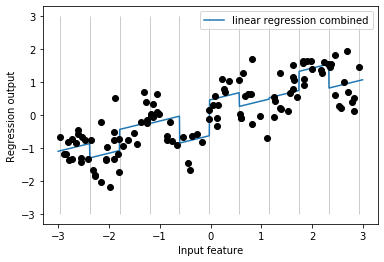

In [56]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

In [75]:
X_product = np.hstack([X_binned,X * X_binned])
print(X_product.shape)

(120, 20)


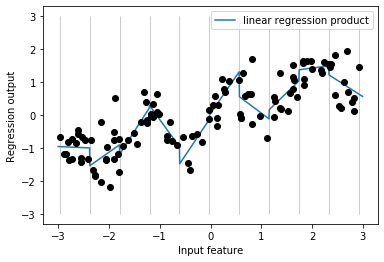

In [76]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")